In [38]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel

In [2]:
wine = datasets.load_wine()
df_wine = pd.DataFrame(wine.data , columns=wine.feature_names)
df_wine['class_label'] = wine.target
x = df_wine.iloc[:,0:-1].values
y = df_wine.iloc[:,-1].values
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.3, random_state=1 , stratify = y)

In [4]:
forest = RandomForestClassifier(n_estimators=100, random_state=1)

In [6]:
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [7]:
importance = forest.feature_importances_

In [8]:
importance

array([0.12601054, 0.02797766, 0.0106316 , 0.04239039, 0.02290837,
       0.04658827, 0.14268641, 0.00796557, 0.03036863, 0.14438947,
       0.06691008, 0.12470648, 0.20646652])

In [14]:
labels = df_wine.columns[0:-1]

In [15]:
labels

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [22]:
indices = np.argsort(importance)[::-1] 

In [23]:
indices

array([12,  9,  6,  0, 11, 10,  5,  3,  8,  1,  4,  2,  7], dtype=int64)

In [32]:
for f in range(x_train.shape[1]):
    print(" %d) %-*s %f" % (f+1 ,30, labels[indices[f]] , importance[indices[f]]))

 1) proline                        0.206467
 2) color_intensity                0.144389
 3) flavanoids                     0.142686
 4) alcohol                        0.126011
 5) od280/od315_of_diluted_wines   0.124706
 6) hue                            0.066910
 7) total_phenols                  0.046588
 8) alcalinity_of_ash              0.042390
 9) proanthocyanins                0.030369
 10) malic_acid                     0.027978
 11) magnesium                      0.022908
 12) ash                            0.010632
 13) nonflavanoid_phenols           0.007966


In [18]:
x_train.shape[1]

13

([<matplotlib.axis.XTick at 0x2b1b39491d0>,
 <a list of 13 Text xticklabel objects>)

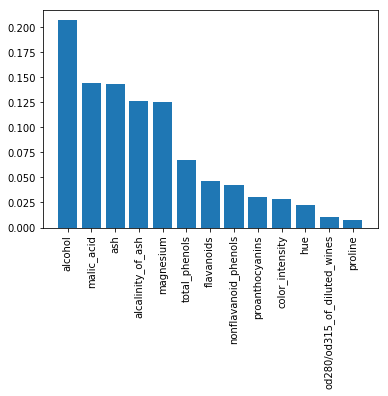

In [37]:
plt.bar(range(x_train.shape[1]),importance[indices])
plt.xticks(range(x_train.shape[1]), labels, rotation=90)

In [39]:
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)

In [42]:
x_selected = sfm.transform(x_train)

In [44]:
x_selected.shape[0]

124

In [47]:
for f in range(x_selected.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30 , labels[indices[f]], importance[indices[f]]))

 1) proline                        0.206467
 2) color_intensity                0.144389
 3) flavanoids                     0.142686
 4) alcohol                        0.126011
 5) od280/od315_of_diluted_wines   0.124706
